### Importing Required Libraries
- pandas for data manipulation
- numpy for numerical operations
- matplotlib for basic plotting
- seaborn for advanced visualization
- scikit-learn for machine learning
- XGBoost for gradient boosting


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from xgboost import XGBRegressor
from adjustText import adjust_text 

### Loading Training Dataset
Loading the training data for model development


In [30]:
df = pd.read_csv("assets/train.csv")
original_df = df
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Handle missing values


### Handling Missing Values
Addressing missing or null values in the dataset


In [31]:
df.drop(["Id"], axis=1, inplace=True)

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numeric with median
df.fillna("Unknown", inplace=True)  # Fill categorical with "Unknown"

### Model Training
Training the machine learning model


In [32]:
label_encoders = {}
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Train XGBoost model


### XGBoost Model
Training an XGBoost model


In [33]:
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

### Model Training
Training the machine learning model


In [34]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_5_features = feature_importance.nlargest(5).index.tolist()
print("Top 5 Features for Clustering:", top_5_features)


Top 5 Features for Clustering: ['OverallQual', 'GarageCars', 'GrLivArea', 'KitchenAbvGr', 'BsmtQual']


### Model Training
Training the machine learning model


In [35]:
scaler = StandardScaler()
X_top5_scaled = scaler.fit_transform(df[top_5_features])

### Model Evaluation
Evaluating model performance


In [36]:
inertia = []
sil_scores = []
k_range = range(2, 10)

## Sum of squared distances


### Model Training
Training the machine learning model


In [37]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_top5_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    sil_scores.append(silhouette_score(X_top5_scaled, kmeans.labels_))  # Silhouette score


### Data Visualization
Creating visualizations to understand the data


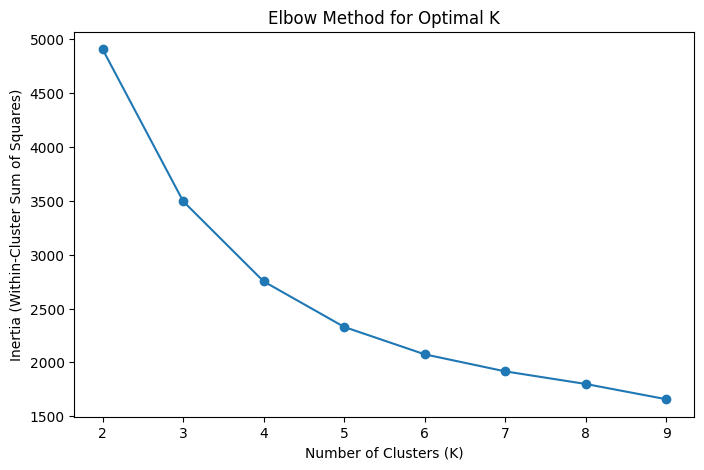

In [38]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="-")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

### Data Visualization
Creating visualizations to understand the data


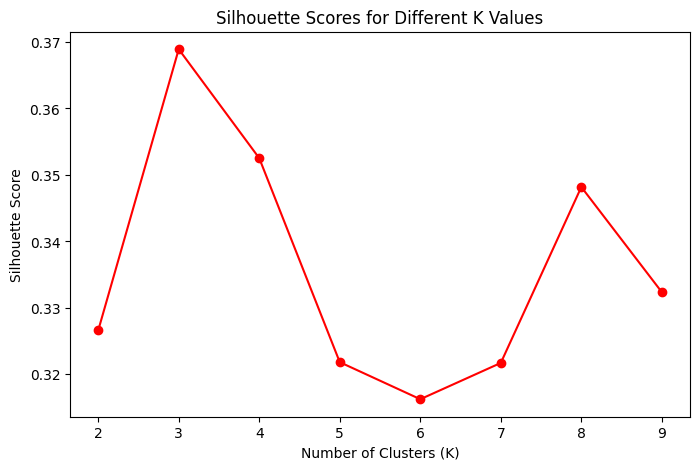

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker="o", linestyle="-", color='red')
plt.title("Silhouette Scores for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

## Choose based on elbow & silhouette score


### Model Training
Training the machine learning model


In [40]:
best_k = 4  # Choose based on elbow & silhouette score
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_top5_scaled)


## Group by Cluster and show actual neighborhood names


### Code Execution
Executing code for data analysis or model development


In [41]:

df["Neighborhood_Text"] = label_encoders["Neighborhood"].inverse_transform(df["Neighborhood"])

# Group by Cluster and show actual neighborhood names
neighborhood_clusters = df.groupby("Cluster")["Neighborhood_Text"].unique()

print("\nNeighborhoods in Each Cluster:")
for cluster, neighborhoods in neighborhood_clusters.items():
    print(f"Cluster {cluster}: {list(neighborhoods)}")
print("\nNeighborhoods in Each Cluster:")
for cluster, neighborhoods in neighborhood_clusters.items():
    print(f"Cluster {cluster}: {list(neighborhoods)}")

# **Step 5: Analyze Price Trends per Cluster**
cluster_prices = df.groupby("Cluster")["SalePrice"].mean().sort_values()
print("\nAverage House Prices per Cluster:")
print(cluster_prices)


Neighborhoods in Each Cluster:
Cluster 0: ['CollgCr', 'Veenker', 'Crawfor', 'Mitchel', 'NWAmes', 'BrkSide', 'NridgHt', 'NAmes', 'Somerst', 'Gilbert', 'SawyerW', 'OldTown', 'ClearCr', 'NoRidge', 'IDOTRR', 'NPkVill', 'Sawyer', 'Edwards', 'Timber', 'StoneBr', 'Blmngtn', 'SWISU', 'Blueste', 'MeadowV']
Cluster 1: ['Sawyer', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'BrkSide', 'CollgCr', 'Timber', 'OldTown', 'Mitchel', 'Crawfor', 'Edwards', 'ClearCr', 'BrDale', 'SWISU', 'Gilbert', 'NWAmes']
Cluster 2: ['OldTown', 'BrkSide', 'Sawyer', 'Edwards', 'SawyerW', 'Mitchel', 'NAmes', 'Crawfor', 'SWISU', 'IDOTRR', 'NWAmes']
Cluster 3: ['NoRidge', 'Somerst', 'NridgHt', 'CollgCr', 'Mitchel', 'Veenker', 'StoneBr', 'SawyerW', 'Timber', 'OldTown', 'Crawfor', 'NAmes', 'Blmngtn', 'Edwards', 'Gilbert', 'NWAmes', 'ClearCr']

Neighborhoods in Each Cluster:
Cluster 0: ['CollgCr', 'Veenker', 'Crawfor', 'Mitchel', 'NWAmes', 'BrkSide', 'NridgHt', 'NAmes', 'Somerst', 'Gilbert', 'SawyerW', 'OldTown', 'ClearCr', 'NoRi

### Model Training
Training the machine learning model


In [42]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X_top5_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]


### Importing Required Libraries
- matplotlib for basic plotting
- seaborn for advanced visualization


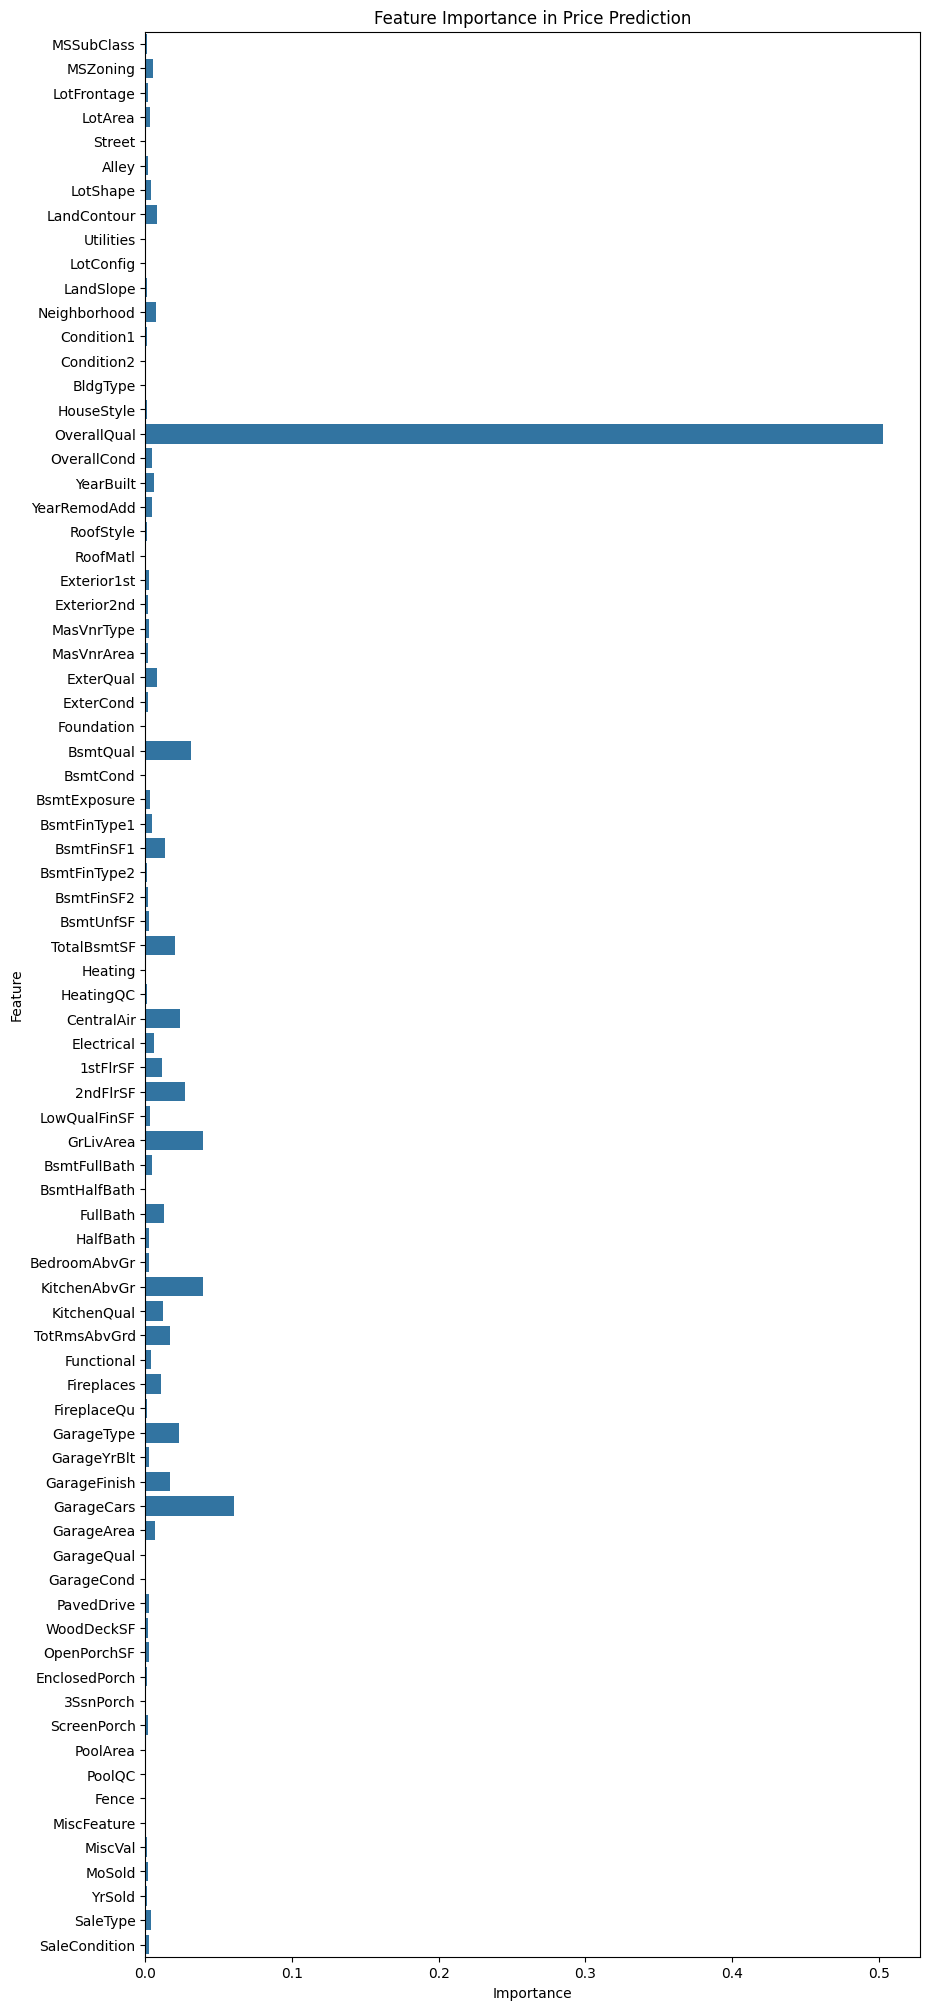

In [45]:
plt.figure(figsize=(10, 25))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance in Price Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Code Execution
Executing code for data analysis or model development


In [46]:
cluster_descriptions = {
    0: "Cluster 0: Affordable housing, older homes, small lots ",
    1: "Cluster 1: Middle-class neighborhoods, rental potential ",
    2: "Cluster 2: Family-friendly, larger homes, newer developments ",
    3: "Cluster 3: Luxury homes, premium locations, high-end finishes "
}

## Reduce clutter by showing fewer labels


### Data Preprocessing
Preparing the data for analysis


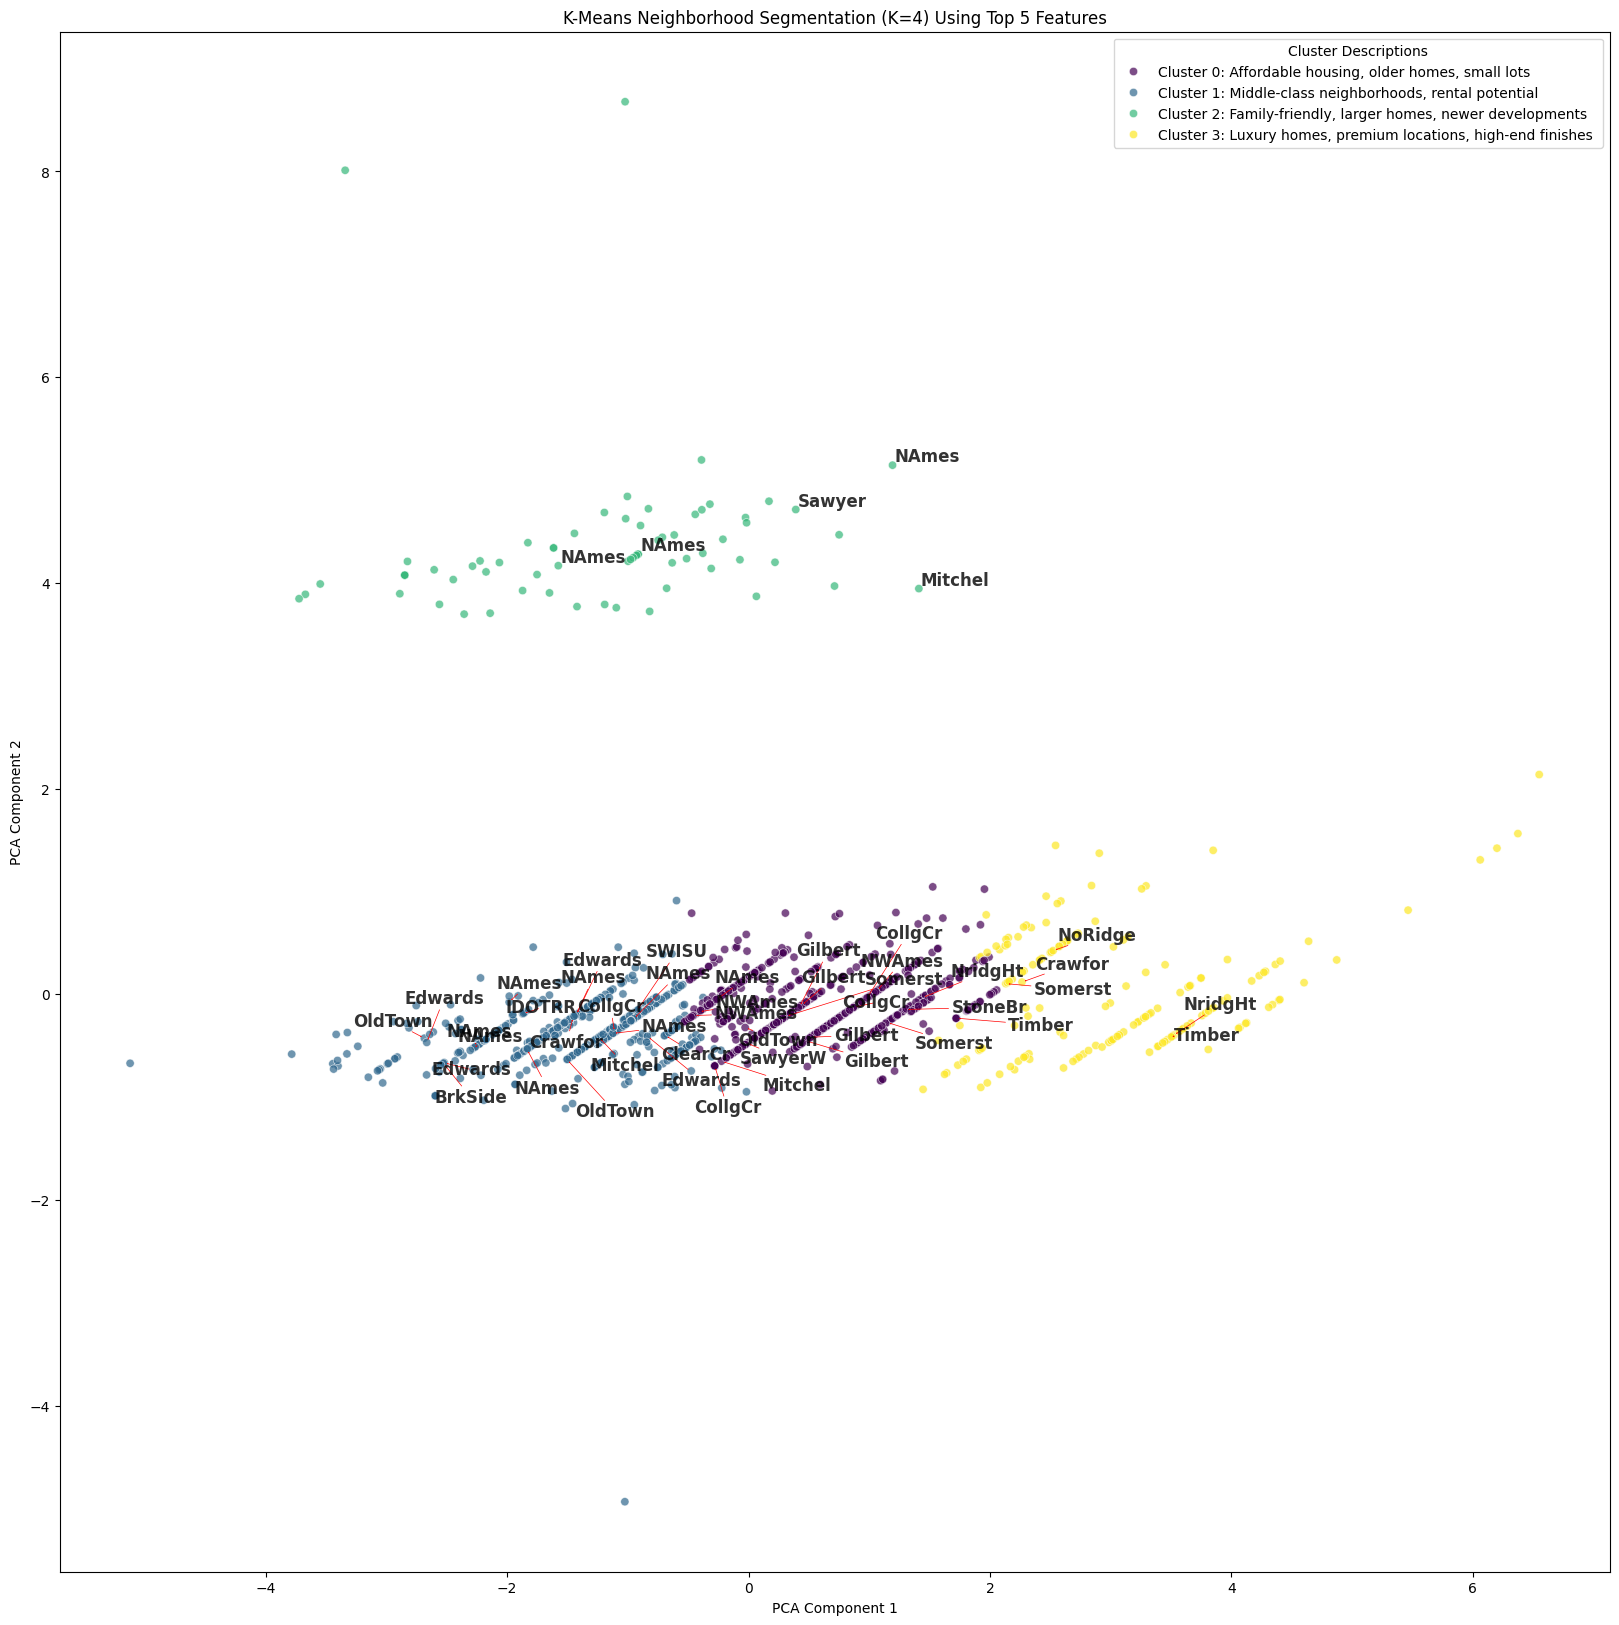

In [48]:
plt.figure(figsize=(20,20))

scatter = sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title(f"K-Means Neighborhood Segmentation (K={best_k}) Using Top 5 Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

texts = []
for i in range(df.shape[0]):
    if i % 30 == 0:  # Reduce clutter by showing fewer labels
        texts.append(
            plt.text(
                df["PCA1"][i], df["PCA2"][i], df["Neighborhood_Text"][i], 
                fontsize=12, alpha=0.8, weight="bold"
            )
        )

# Adjust text to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="red", lw=0.5))

# **Update legend labels with descriptions**
handles, labels = scatter.get_legend_handles_labels()
new_labels = [cluster_descriptions[int(label)] for label in labels]  # Convert cluster numbers to descriptions
plt.legend(handles, new_labels, title="Cluster Descriptions", loc="best")

plt.show()

### Code Execution
Executing code for data analysis or model development
